In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data summary and statistics

##Using transaction level labels

Original labels

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_classes = pd.read_csv("/content/drive/MyDrive/Original_Elliptic/raw/elliptic_txs_classes.csv")


In [4]:
original_classes["class"] = original_classes["class"].replace("1", "illict")
original_classes["class"] = original_classes["class"].replace("2", "licit")

In [5]:
original_classes["class"].value_counts()

unknown    157205
licit       42019
illict       4545
Name: class, dtype: int64

In [6]:
original_classes["class"].value_counts(normalize = True)

unknown    0.771486
licit      0.206209
illict     0.022305
Name: class, dtype: float64

Augmented labels

In [7]:
df_classes = pd.read_csv("/content/drive/MyDrive/Augmented_Elliptic/elliptic_txs_classes_augmented_input.csv")

# There exists 3 different classes in the dataset:
df_classes["class"] = df_classes["class"].replace(0, "2")
df_classes["class"] = df_classes["class"].replace(1, "1")
df_classes["class"] = df_classes["class"].fillna("unknown")
# 0=licit,  1=illicit, 2=unknown
mapping = {'unknown': 2, '1': 1, '2': 0}
df_classes['class'] = df_classes['class'].map(mapping)


In [8]:
df_classes["class"] = df_classes["class"].replace(2, "unknown")
df_classes["class"] = df_classes["class"].replace(0, "low risk")
df_classes["class"] = df_classes["class"].replace(1, "high risk")

In [9]:
df_classes["class"].value_counts()

unknown      157234
low risk      39720
high risk      6815
Name: class, dtype: int64

In [10]:
df_classes["class"].value_counts(normalize = True)

unknown      0.771629
low risk     0.194927
high risk    0.033445
Name: class, dtype: float64

In [11]:
original_classes["class"].value_counts(normalize = True)

unknown    0.771486
licit      0.206209
illict     0.022305
Name: class, dtype: float64

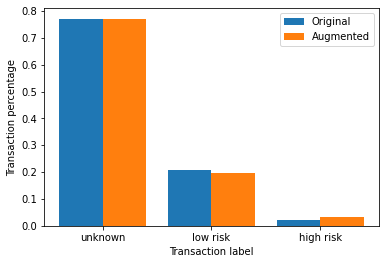

In [44]:
import matplotlib.pyplot as plt 

X = df_classes["class"].unique()
X_axis = np.arange(len(X))


plt.bar(X_axis - 0.2, height = original_classes["class"].value_counts(normalize = True), width = 0.4, label = "Original")
plt.bar(X_axis + 0.2, height = df_classes["class"].value_counts(normalize = True), width = 0.4, label = "Augmented")

plt.xticks(X_axis, X)
plt.xlabel("Transaction label")
plt.ylabel("Transaction percentage")
#plt.title("Share of No. of Transactions by Label")
plt.legend()
plt.show()

In [13]:
panel = pd.read_csv("/content/drive/MyDrive/Augmented_Elliptic/address_level/elliptic_panel.csv")

In [14]:
panel["class"] = panel["class"].replace(2, 1)
panel["class"] = panel["class"].fillna(-1)

In [15]:
print("No. of unique input addresses", str(len(panel.input_address.unique())))
print("No. of unique output addresses", str(len(panel.output_address.unique())))
print("No. of unique total addresses", str(len(pd.unique(panel[["input_address", "output_address"]].values.ravel()))))

No. of unique input addresses 400212
No. of unique output addresses 641415
No. of unique total addresses 823284


In [16]:
#avg number of input addresses per transaction
print("Mean no. of input addresses per transaction", str(round(np.mean(panel.groupby("txId")["input_address"].count()), 1)))
print("Median no. of input addresses per transaction", str(np.median(panel.groupby("txId")["input_address"].count())))
print("Max no. of input addresses per transaction", str(max(panel.groupby("txId")["input_address"].count())))

Mean no. of input addresses per transaction 16.6
Median no. of input addresses per transaction 2.0
Max no. of input addresses per transaction 69069


In [17]:
#avg number of output addresses per transaction
print("Mean no. of output addresses per transaction", str(round(np.mean(panel.groupby("txId")["output_address"].count()), 1)))
print("Median no. of output addresses per transaction", str(np.median(panel.groupby("txId")["output_address"].count())))
print("Max no. of output addresses per transaction", str(max(panel.groupby("txId")["output_address"].count())))

Mean no. of output addresses per transaction 16.6
Median no. of output addresses per transaction 2.0
Max no. of output addresses per transaction 69069


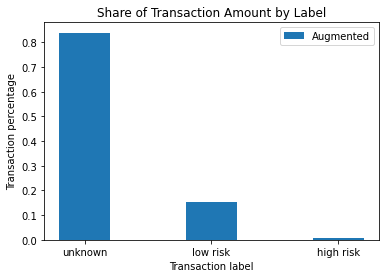

In [40]:
#?still to add original to compare? 
X = ["unknown", "low risk", "high risk"]
X_axis = np.arange(len(X))

plt.bar(X_axis, height = panel.groupby("class")["txn_amount"].sum()/panel["txn_amount"].sum(), width = 0.4, label = "Augmented")

plt.xticks(X_axis, X)
plt.xlabel("Transaction label")
plt.ylabel("Transaction percentage")
plt.title("Share of Transaction Amount by Label")
plt.legend()
plt.show()

In [19]:
panel.groupby("class")["txn_amount"].sum()/panel["txn_amount"].sum()

class
-1.0    0.839180
 0.0    0.154878
 1.0    0.005942
Name: txn_amount, dtype: float64

##Address level data

In [20]:
#Look at the average number of outgoing transactions for licit and illicit nodes 
print("Mean illicit no. of outgoing transactions ", str(round(np.mean(panel.loc[panel["class"] == 1].groupby("input_address")["txId"].count()), 1))) #illicit 
print("Mean licit no. of outgoing transactions ", str(round(np.mean(panel.loc[panel["class"] == 0].groupby("input_address")["txId"].count()), 1)))

print("Median illicit no. of outgoing transactions ", str(round(np.median(panel.loc[panel["class"] == 1].groupby("input_address")["txId"].count()), 1))) #illicit 
print("Median licit no. of outgoing transactions ", str(round(np.median(panel.loc[panel["class"] == 0].groupby("input_address")["txId"].count()), 1)))


Mean illicit no. of outgoing transactions  3.7
Mean licit no. of outgoing transactions  10.3
Median illicit no. of outgoing transactions  1.0
Median licit no. of outgoing transactions  2.0


In [21]:
txn_no_group = panel.groupby(["input_address", "class"])["txId"].count()
txn_no_group = txn_no_group.reset_index()

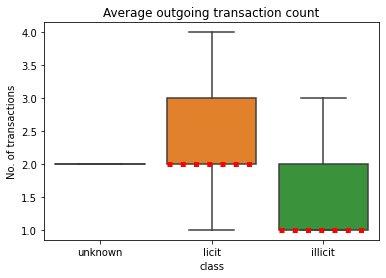

In [41]:
X = ["unknown", "low risk", "high risk"]
X_axis = np.arange(len(X))

ax = sns.boxplot(x="class", y = "txId", data=txn_no_group, showfliers = False)
ax.set(title = "Average outgoing transaction count")
ax.set_xticklabels(['unknown','low risk','high risk'])
ax.set_ylabel("No. of transactions")

# set median line style
l = ax.lines[9]
m = ax.lines[14]
l.set_linestyle(':')
l.set_color('r')
l.set_linewidth(5)
l.set_alpha(1)
m.set_linestyle(':')
m.set_color('r')
m.set_linewidth(5)
m.set_alpha(1)
plt.show()

In [23]:
#Look at the average amount per outgoing transaction for licit and illicit nodes 
print("Mean illicit transaction outgoing amounts ", str("{:,}".format(round(np.mean(panel.loc[panel["class"] == 1].groupby("input_address")["txn_amount"].sum())))))
print("Mean licit transaction outgoing amounts ", str("{:,}".format(round(np.mean(panel.loc[panel["class"] == 0].groupby("input_address")["txn_amount"].sum())))))

print("Median illicit transaction outgoing amounts ", str("{:,}".format(round(np.median(panel.loc[panel["class"] == 1].groupby("input_address")["txn_amount"].sum())))))
print("Median licit transaction outgoing amounts ", str("{:,}".format(round(np.median(panel.loc[panel["class"] == 0].groupby("input_address")["txn_amount"].sum())))))

Mean illicit transaction outgoing amounts  112,845,323
Mean licit transaction outgoing amounts  502,835,886
Median illicit transaction outgoing amounts  699,888
Median licit transaction outgoing amounts  2,089,354


In [24]:
txn_amount_group = panel.groupby(["input_address", "class"])["txn_amount"].sum()

[Text(0, 0, 'unknown'), Text(0, 0, 'licit'), Text(0, 0, 'illicit')]

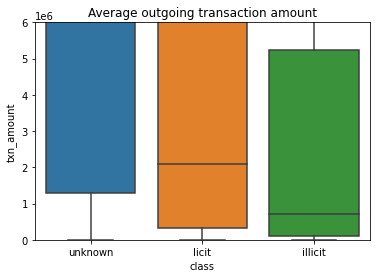

In [25]:
txn_amount_group = txn_amount_group.reset_index()
ax = sns.boxplot(x="class", y = "txn_amount", data=txn_amount_group, showfliers = False)
ax.set(ylim=(0, 6000000), title = "Average outgoing transaction amount")
ax.set_xticklabels(['unknown','licit','illicit'])

In [26]:
#Look at the average number of output addresses per transaction for licit and illicit nodes 
print("Mean illicit output addresses per transaction ", str(round(np.mean(panel.loc[panel["class"] == 1].groupby(["input_address", "txId"])["txn_amount"].count()), 1)))
print("Mean licit output addresses per transaction ", str(round(np.mean(panel.loc[panel["class"] == 0].groupby(["input_address", "txId"])["txn_amount"].count()), 1)))

print("Median illicit output addresses per transaction ", str(round(np.median(panel.loc[panel["class"] == 1].groupby(["input_address", "txId"])["txn_amount"].count()), 1)))
print("Median licit output addresses per transaction ", str(round(np.median(panel.loc[panel["class"] == 0].groupby(["input_address", "txId"])["txn_amount"].count()), 1)))

Mean illicit output addresses per transaction  3.2
Mean licit output addresses per transaction  8.5
Median illicit output addresses per transaction  1.0
Median licit output addresses per transaction  2.0


In [27]:
addr_amount_group = panel.groupby(["input_address", "txId", "class"])["txn_amount"].count()
addr_amount_group = addr_amount_group.reset_index()
addr_amount_group = addr_amount_group.groupby(["input_address", "class"])["txn_amount"].mean()
addr_amount_group = addr_amount_group.reset_index()

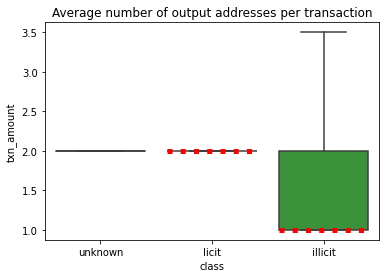

In [28]:
ax = sns.boxplot(x="class", y = "txn_amount", data=addr_amount_group, showfliers = False)
ax.set(title = "Average number of output addresses per transaction")
ax.set_xticklabels(['unknown','low risk','high risk'])
# set median line style
l = ax.lines[9]
m = ax.lines[14]
l.set_linestyle(':')
l.set_color('r')
l.set_linewidth(5)
l.set_alpha(1)
m.set_linestyle(':')
m.set_color('r')
m.set_linewidth(5)
m.set_alpha(1)
plt.show()

#Elliptic addresses vs Clovr addresses

In [29]:
import pandas as pd

In [30]:
clovr_addresses = pd.read_csv("/content/drive/MyDrive/Augmented_Elliptic/address_level/labels_ell_address.csv", header = None)

In [31]:
clovr_addresses.columns = ["addresses", "number", "entity", "category", "risk"]

In [32]:
elliptic_inputs = pd.read_csv("/content/drive/MyDrive/Original_Elliptic/elliptic blockchain raw/inputs.csv")

In [33]:
elliptic_inputs

,Unnamed: 0,index,hash,spent_transaction_hash,addresses,value,spent_output_index
0,0,0,25ed671d23313ab42c5f7adb02241881f103bc96751f0b...,91d48d13b3b14a3ceba77308fc04248cad328c5f7e27e2...,189hYTwr2ufByQiemfoA8Go6h6MYwGeHas,19200.0,29
1,1,1,25ed671d23313ab42c5f7adb02241881f103bc96751f0b...,6297ac568c8920524d772afeaf2cb34224b0ce56198541...,1D7wdkmi2PQTvPEQxqhtHMM3NoPTDK1dVd,11147876.0,1
2,2,2,25ed671d23313ab42c5f7adb02241881f103bc96751f0b...,11c4496ccceb1e5ddeb0494d59692e3247b453b9f915bf...,19WuSzgcWrx9u4bNWwiak3x1yK2wWQDvVQ,12000000.0,0
3,3,3,25ed671d23313ab42c5f7adb02241881f103bc96751f0b...,962813ee8101ccea00104847e8e25a5a6996b7f5fc488d...,1Nf7uW9i6Ao1aRuPH6N2wFUjWo16fZxehp,742000.0,0
4,4,4,25ed671d23313ab42c5f7adb02241881f103bc96751f0b...,a4f9f06a49b43aa9691d71fdebd8642394c873ae777c89...,1ELKdi1Q4TiehbxxiS1peuZJncUHhbGtso,26484.0,47
...,...,...,...,...,...,...,...
533724,533724,0,85d1e894356939198b20e5e24f198c76b2121d2a357122...,9b33a72f6e77ffeea4617c3db3fc1159abe3ed7490fc5c...,1AyKENBvjMzk1e89jxjhJuKM46WSx3PBV7,100000.0,2
533725,533725,1,85d1e894356939198b20e5e24f198c76b2121d2a357122...,7ea3327ee9e489d368c5a500e1031a4f2c610220d58fa2...,1KPXXWCDGBTVqcVPoKWFy4SpkzHi1mhc9g,83668.0,0
533726,533726,2,85d1e894356939198b20e5e24f198c76b2121d2a357122...,07e43e27a273adf4225bdebfbd726681aa04ac461e3612...,13z4523uCKXaLbDPSmTpnNgc1GnG9hzonf,226788.0,2
533727,533727,3,85d1e894356939198b20e5e24f198c76b2121d2a357122...,ff7ff557a1c343378302b49dceee28fe0f45fb27664cde...,167XHQDL9iVCLBL3YdL2Bi2D3Vxcqinxjj,81016.0,1


In [34]:
elliptic_outputs = pd.read_csv("/content/drive/MyDrive/Original_Elliptic/elliptic blockchain raw/outputs.csv")

###Share of number of unique addresses 

In [35]:
clovr_addresses["risk"] = clovr_addresses["risk"].fillna("unknown")
clovr_addresses["risk"].value_counts()

0.0        13366
1.0         5969
unknown     1297
Name: risk, dtype: int64

In [36]:
elliptic_inputs = elliptic_inputs.merge(clovr_addresses[["addresses", "risk"]], how = "left", on = "addresses")
elliptic_outputs = elliptic_outputs.merge(clovr_addresses[["addresses", "risk"]], how = "left", on = "addresses")

In [37]:
elliptic_inputs_grouped = elliptic_inputs.groupby("addresses")["risk"].first()
elliptic_inputs_grouped.value_counts()

0.0        6531
1.0        3578
unknown     807
Name: risk, dtype: int64

In [38]:
elliptic_outputs_grouped = elliptic_outputs.groupby("addresses")["risk"].first()
elliptic_outputs_grouped.value_counts()

0.0        10378
1.0         4340
unknown      645
Name: risk, dtype: int64

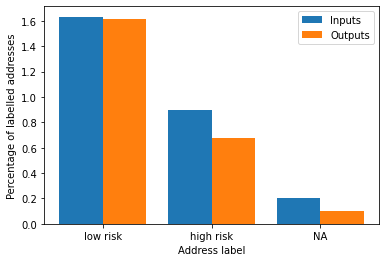

In [43]:
import matplotlib.pyplot as plt 
import numpy as np

X = ["low risk", "high risk", "NA"]
X_axis = np.arange(len(X))


plt.bar(X_axis - 0.2, height = elliptic_inputs_grouped.value_counts()*100/len(elliptic_inputs["addresses"].unique()), width = 0.4, label = "Inputs")
plt.bar(X_axis + 0.2, height = elliptic_outputs_grouped.value_counts()*100/len(elliptic_outputs["addresses"].unique()), width = 0.4, label = "Outputs")

plt.xticks(X_axis, X)
plt.xlabel("Address label")
plt.ylabel("Percentage of labelled addresses")
#plt.title("Percentage of Clovr labelled addresses in Elliptic dataset")
plt.legend()
plt.show()